In [36]:
#%env KERAS_BACKEND=theano  # This is WRONG, use K.set_image_dim_ordering('th') instead

#import numpy
#import theano
#print numpy.__version__
#print theano.__version__
#import keras
#print keras.__version__


import numpy as np
np.random.seed(123)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


from keras import backend as K
K.set_image_dim_ordering('th')

%matplotlib inline

In [37]:
from six.moves import cPickle as pickle
pickle_file = 'notMNIST.pickle'
try:
    with open(pickle_file) as f:
        save=pickle.load(f)
except Exception as e:
  print('Unable to load data from', pickle_file, ':', e)
  raise
    
X_train_dataset=save['train_dataset']
Y_train_labels=save['train_labels']

X_test_dataset=save['test_dataset']
Y_test_labels=save['test_labels']

X_valid_dataset=save['valid_dataset']
Y_valid_labels=save['valid_labels']

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

In [38]:
print (X_train_dataset.shape)
print (Y_train_labels)
print (X_test_dataset.shape)
print (Y_test_labels)
print (X_valid_dataset.shape)
print (Y_valid_labels)


(200000, 28, 28)
[4 9 6 ..., 2 4 4]
(10000, 28, 28)
[3 6 4 ..., 6 9 0]
(10000, 28, 28)
[1 9 3 ..., 8 9 8]


J


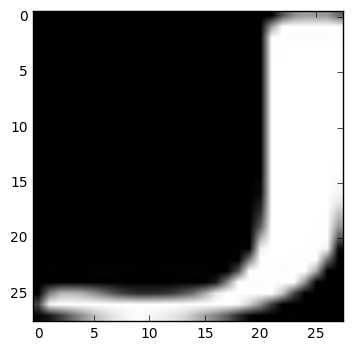

In [41]:
sample_no=34

from matplotlib import pyplot as plt
plt.imshow(X_train_dataset[sample_no] , cmap='gray')
print (letters[Y_train_labels[sample_no]])

In [5]:
X_train_dataset = X_train_dataset.reshape(X_train_dataset.shape[0], 1, 28, 28)
X_test_dataset = X_test_dataset.reshape(X_test_dataset.shape[0], 1, 28, 28)

X_train_dataset = X_train_dataset.astype('float32')
X_test_dataset = X_test_dataset.astype('float32')

X_train_dataset /= 255
X_test_dataset /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train_labels = np_utils.to_categorical(Y_train_labels, 10)
Y_test_labels = np_utils.to_categorical(Y_test_labels, 10)



# VALID
X_valid_dataset = X_valid_dataset.reshape(X_valid_dataset.shape[0], 1, 28, 28)
X_valid_dataset = X_valid_dataset.astype('float32')
X_valid_dataset /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_valid_labels = np_utils.to_categorical(Y_valid_labels, 10)

In [6]:
model = Sequential()
 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
#model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(256, 5, 5, subsample=(2, 2), border_mode = 'same', activation='relu',input_shape=(1,28,28)))
model.add(Convolution2D(256, 5, 5, subsample=(2, 2), border_mode = 'same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 256, 14, 14)   6656        convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 256, 7, 7)     1638656     convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 256, 3, 3)     0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 256, 3, 3)     0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [7]:
history=model.fit(X_train_dataset, Y_train_labels, validation_split=0.33,
          batch_size=32, nb_epoch=10, verbose=1)

Train on 134000 samples, validate on 66000 samples
Epoch 1/10
134000/134000 [==============================] - 605s - loss: 0.8194 - acc: 0.7518 - val_loss: 0.4882 - val_acc: 0.8530
Epoch 2/10
134000/134000 [==============================] - 585s - loss: 0.5761 - acc: 0.8288 - val_loss: 0.4336 - val_acc: 0.8675
Epoch 3/10
134000/134000 [==============================] - 584s - loss: 0.5289 - acc: 0.8416 - val_loss: 0.4125 - val_acc: 0.8741
Epoch 4/10
134000/134000 [==============================] - 601s - loss: 0.4966 - acc: 0.8516 - val_loss: 0.3916 - val_acc: 0.8809
Epoch 5/10
134000/134000 [==============================] - 580s - loss: 0.4784 - acc: 0.8564 - val_loss: 0.3798 - val_acc: 0.8826
Epoch 6/10
134000/134000 [==============================] - 581s - loss: 0.4631 - acc: 0.8600 - val_loss: 0.3706 - val_acc: 0.8865
Epoch 7/10
134000/134000 [==============================] - 598s - loss: 0.4500 - acc: 0.8642 - val_loss: 0.3693 - val_acc: 0.8867
Epoch 8/10
134000/134000 [======

In [25]:
history=model.fit(X_train_dataset, Y_train_labels, validation_split=0.33, initial_epoch=11, 
          batch_size=32, nb_epoch=15, verbose=1)

Train on 134000 samples, validate on 66000 samples
Epoch 12/15
134000/134000 [==============================] - 580s - loss: 0.4138 - acc: 0.8743 - val_loss: 0.3350 - val_acc: 0.8967
Epoch 13/15
134000/134000 [==============================] - 579s - loss: 0.4059 - acc: 0.8760 - val_loss: 0.3353 - val_acc: 0.8982
Epoch 14/15
134000/134000 [==============================] - 592s - loss: 0.4025 - acc: 0.8772 - val_loss: 0.3293 - val_acc: 0.8983
Epoch 15/15
134000/134000 [==============================] - 590s - loss: 0.3968 - acc: 0.8795 - val_loss: 0.3279 - val_acc: 0.8987


In [26]:
score_test = model.evaluate(X_test_dataset, Y_test_labels, verbose=1)


 9984/10000 [============================>.] - ETA: 0s

In [27]:
print("%s: %.2f%%" % (model.metrics_names[1], score_test[1]*100))

acc: 95.45%


In [28]:
score_valid = model.evaluate(X_valid_dataset, Y_valid_labels, verbose=1)


 9952/10000 [============================>.] - ETA: 0s

In [29]:
print("%s: %.2f%%" % (model.metrics_names[1], score_valid[1]*100))

acc: 89.89%


['acc', 'loss', 'val_acc', 'val_loss']


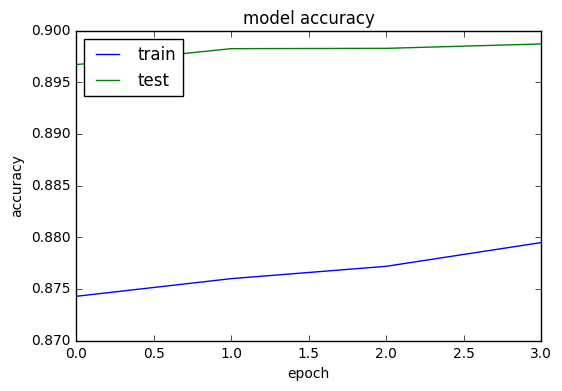

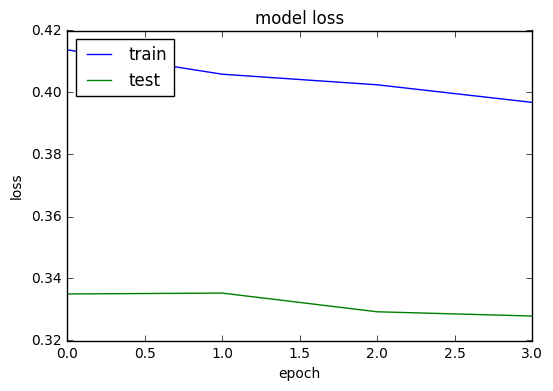

In [30]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()